In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson

# Useful function for the plots

In [2]:
# Changes in the purchase probability function
def PurchaseProbabilityLogit_plot(beta_parameters, jump_days):
    n_points = 100
    prices = np.linspace(0, 1, n_points)
    alpha = 1
    
    # Calcola il numero totale di subplot
    num_subplots = len(jump_days)
     
    # Crea la figura e gli assi dei subplot
    fig, axes = plt.subplots(1, num_subplots, figsize=(20, 5))
    axes = axes.flatten() 
    
    for i, jump_day in enumerate(jump_days):
        # Calcola le probabilità di acquisto usando il corrispondente beta_parameter per l'indice jump_day
        purchase_probabilities = 1 / (1 + np.exp(-(alpha + beta_parameters[int(jump_day)] * prices)))    
        
        # Traccia il grafico
        ax = axes[i]
        ax.plot(prices, purchase_probabilities)
        ax.set_title(f'Jump: {i}')
        ax.set_xlabel('Prices')
        ax.set_ylabel('Purchase Probabilities')

    # Aggiusta il layout
    plt.tight_layout()
    plt.show()

In [3]:
# Changes in the purchase probability function
def PurchaseProbabilityLinear_plot(beta_parameters, jump_days):
    n_points = 100
    prices = np.linspace(0, 1, n_points)
    alpha = 1
    beta = 1
    
    # Calcola il numero totale di subplot
    num_subplots = len(jump_days)
     
    # Crea la figura e gli assi dei subplot
    fig, axes = plt.subplots(1, num_subplots, figsize=(20, 5))
    axes = axes.flatten() 
    
    for i, jump_day in enumerate(jump_days):
        # Calcola le probabilità di acquisto usando il corrispondente beta_parameter per l'indice jump_day
        purchase_probabilities = p_parameters[int(jump_day)]*(alpha - beta*prices)    
        
        # Traccia il grafico
        ax = axes[i]
        ax.plot(prices, purchase_probabilities)
        ax.set_title(f' Parameter: {beta_parameters[int(jump_day)]}')
        ax.set_xlabel('Prices')
        ax.set_ylabel('Purchase Probabilities')

    # Aggiusta il layout
    plt.tight_layout()
    plt.show()     

In [4]:
# Changes in the purchase probability function
def PurchaseProbabilityProbit_plot(beta_parameters, jump_days):
    n_points = 100
    prices = np.linspace(0, 1, n_points)
    alpha = 0
    
    # Calcola il numero totale di subplot
    num_subplots = len(jump_days)
     
    # Crea la figura e gli assi dei subplot
    fig, axes = plt.subplots(1, num_subplots, figsize=(20, 5))
    axes = axes.flatten() 
    
    for i, jump_day in enumerate(jump_days):
        # Calcola le probabilità di acquisto usando il corrispondente beta_parameter per l'indice jump_day
        purchase_probabilities = norm.cdf(alpha + beta_parameters[int(jump_day)] * prices)
        
        # Traccia il grafico
        ax = axes[i]
        ax.plot(prices, purchase_probabilities)
        ax.set_title(f' Parameter: {beta_parameters[int(jump_day)]}')
        ax.set_xlabel('Prices')
        ax.set_ylabel('Purchase Probabilities')

    # Aggiusta il layout
    plt.tight_layout()
    plt.show()     

# Agents

## UCB1

In [5]:
class UCB1Agent:
    def __init__(self, K, T, range=1):
        self.K = K
        self.T = T
        self.range = range
        self.a_t = None
        self.average_rewards = np.zeros(K)
        self.N_pulls = np.zeros(K)
        self.t = 0
    
    def pull_arm(self):
        if self.t < self.K:
            self.a_t = self.t 
        else:
            ucbs = self.average_rewards + self.range*np.sqrt(2*np.log(self.T)/self.N_pulls)
            self.a_t = np.argmax(ucbs)
        return self.a_t
    
    def update(self, r_t):
        self.N_pulls[self.a_t] += 1
        self.average_rewards[self.a_t] += (r_t - self.average_rewards[self.a_t])/self.N_pulls[self.a_t]
        self.t += 1

## EXP3

In [6]:
class EXP3Agent:
    def __init__(self, K, learning_rate):
        self.K = K
        self.learning_rate = learning_rate
        self.weights = np.ones(K)
        self.a_t = None
        self.x_t = np.ones(K)/K
        self.N_pulls = np.zeros(K)
        self.t = 0

    def pull_arm(self):
        self.x_t = self.weights/sum(self.weights)
        self.a_t = np.random.choice(np.arange(self.K), p=self.x_t)
        return self.a_t
    
    def update(self, l_t):
        l_t_tilde = l_t/self.x_t[self.a_t]
        self.weights[self.a_t] *= np.exp(-self.learning_rate*l_t_tilde)
        self.N_pulls[self.a_t] += 1
        self.t += 1

# Reasonable successful product, Logit

In [54]:
# Load the data
file_path = "Dati/Logit_S=1_Increasing.npz"

data = np.load(file_path)
prices_matrix = data['prices_matrix']
probabilities_matrix = data['probabilities_matrix']
customers_number_matrix = data['customers_number_matrix']
rewards_matrix = data['rewards_matrix']
beta_parameters = data['beta_parameters']
jump_days = data['jump_days']

print(f"Matrices loaded from {file_path}")

Matrices loaded from Dati/Logit_S=1_Increasing.npz


## Environment situation

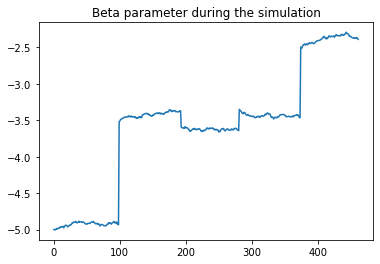

Beta: -4.934299697966296
Beta: -3.3685316432175125
Beta: -3.6428145864653327
Beta: -3.4635161589177175
Beta: -2.3896786513796595


In [55]:
# History of the beta parameter
n_days = data['prices_matrix'].shape[0]

plt.figure()
plt.plot(np.linspace(0, n_days, n_days+1),beta_parameters)
plt.title('Beta parameter during the simulation')
plt.savefig('BetaSequence_Successful.png')
plt.show()

# Values of beta in the jumps
for jump_day in jump_days:
    print(f'Beta: {beta_parameters[int(jump_day)]}')

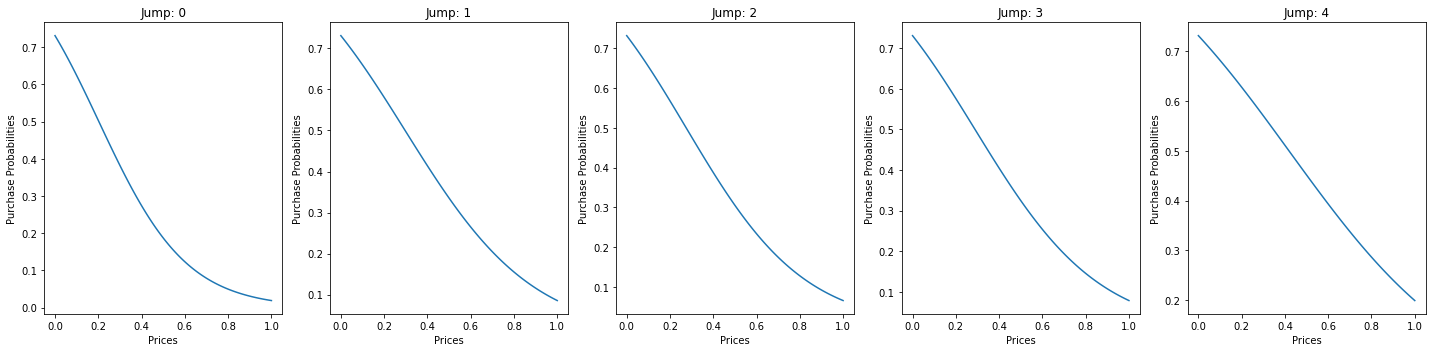

In [56]:
# Plot of the purchase probability when beta jumps
PurchaseProbabilityLogit_plot(beta_parameters, jump_days)

**Comment:**  
Purchase probablity function icreases passing through the market jumps, this can be explain by the fact that either some competitors retreat or the products we're selling is seccessful.

## UCB1

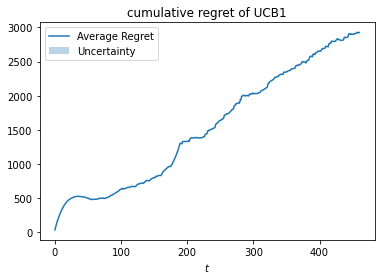

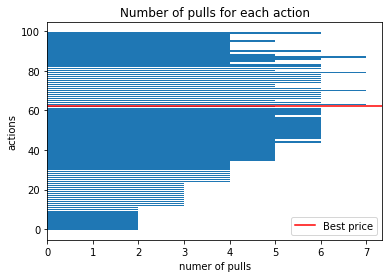

In [70]:
# Parameters
n_points = 100  # actions number 
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days  = data['prices_matrix'].shape[0]
T = n_days

prices = np.linspace(0, max_price, n_points)


best_arm_index = np.argmax(rewards_matrix.sum(axis=0))
best_arm = prices[best_arm_index]
clairvoyant_rewards = rewards_matrix[:, best_arm_index]
n_trials = 100

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    ucb_agent = UCB1Agent(K, T, range=30)

    agent_rewards = np.array([])

    for t in range(T):
        pi_t = ucb_agent.pull_arm() ## the agent returns the index!!
        p_t = prices[pi_t] # I get the actual price
        r_t = rewards_matrix[t, pi_t]
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(100), ucb_agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show();

**Comment:**  
UCB1 agent, with range parameter equal to 1 is not able to reach sublinear regret, then increasing this parameter, and thus the exploration effort, the perfomance improves, until we reach range = 15 more or less; from now on the exploration overcome the exploitation, we lose the trade-off between them and the performances become worst.
  

**Reflexion:**  
In the presentation it would be nice to include the sequence of the comulatiive regret plot increasing the range parameter, to show the performances trend and the achivement of the optimal exploration-exploitation trade off.

## EXP3

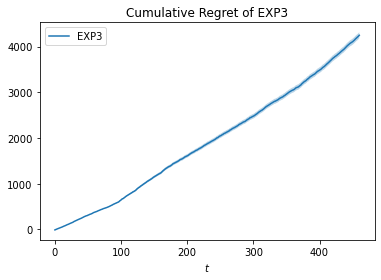

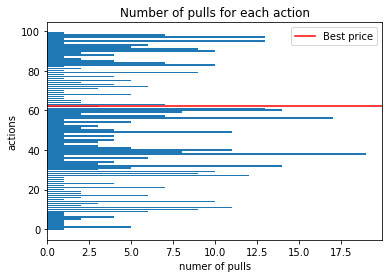

In [11]:
# Parameters
n_points = 100 # actions number
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days = data['prices_matrix'].shape[0]
T = data['prices_matrix'].shape[0]

prices = np.linspace(0, max_price, n_points)

learning_rate = np.sqrt(np.log(K)/(K*T)) # we set the learning rate as prescribed by the theory ( circa 0.01)

max_reward = (max_price - cost) * n_customers
loss_seq = max_reward - rewards_matrix

best_arm_index = np.argmin(loss_seq.sum(axis=0))
best_arm = prices_matrix[0, best_arm_index]
clairvoyant_losses = loss_seq[:, best_arm_index]


n_trials = 100

exp3_regret_per_trial = []
# we keep the loss sequence fixed, we will only observe uncertainty due to algorithm's randomizations
for trial in range(n_trials):
    agent = EXP3Agent(K, learning_rate)
    
    expected_agent_losses = np.array([])
    for t in range(T):
        a_t = agent.pull_arm()
        l_t = loss_seq[t, a_t]
        agent.update(l_t)
        # logging
        expected_agent_losses = np.append(expected_agent_losses,
                                        np.dot(agent.x_t,
                                        loss_seq[t-1,:]))

    cumulative_regret = np.cumsum(expected_agent_losses-clairvoyant_losses)
    exp3_regret_per_trial.append(cumulative_regret)

exp3_regret_per_trial = np.array(exp3_regret_per_trial)

exp3_average_regret = exp3_regret_per_trial.mean(axis=0)
exp3_regret_sd = exp3_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), exp3_average_regret, label='EXP3')
plt.title('Cumulative Regret of EXP3')
plt.fill_between(np.arange(T),
                exp3_average_regret-exp3_regret_sd/np.sqrt(n_trials),
                exp3_average_regret+exp3_regret_sd/np.sqrt(n_trials),
                alpha=0.3)
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(K), agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show()

**Comment:**  
EXP3 fails learning the optimal price in terms of minimum cumulative loss, showing basically a tendence to remain uncertain (I've done some trials changing the learning rate but the result is the same)

# Reasonable successful product, Probit

In [38]:
# Load the data
file_path = "Dati/Probit_S=1,5.npz"

data = np.load(file_path)
prices_matrix = data['prices_matrix']
probabilities_matrix = data['probabilities_matrix']
customers_number_matrix = data['customers_number_matrix']
rewards_matrix = data['rewards_matrix']
beta_parameters = data['beta_parameters']
jump_days = data['jump_days']

print(f"Matrices loaded from {file_path}")

Matrices loaded from Dati/Probit_S=1,5.npz


## Environment situation

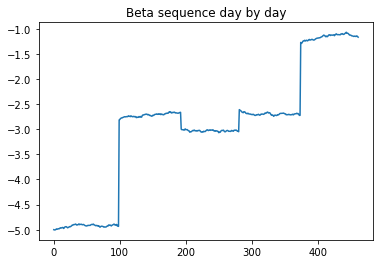

Beta: -4.934299697966296
Beta: -2.6615170754365196
Beta: -3.047553548832595
Beta: -2.721772474353433
Beta: -1.1635915449131218


In [39]:
# History of the beta parameter
n_days = data['prices_matrix'].shape[0]

plt.figure()
plt.plot(np.linspace(0, n_days, n_days+1),beta_parameters)
plt.title('Beta sequence day by day')
plt.show()

# Values of beta in the jumps
for jump_day in jump_days:
    print(f'Beta: {beta_parameters[int(jump_day)]}')

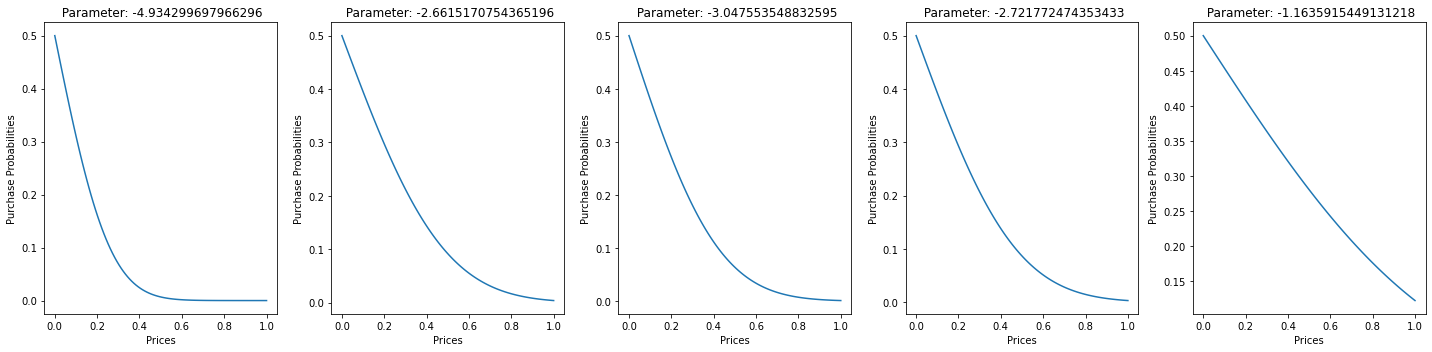

In [40]:
# Plot of the purchase probability when beta jumps
PurchaseProbabilityProbit_plot(beta_parameters, jump_days)

**Comment:**   
This environment represents a situation in the middle between the two Logit ones; in the sense that the purchase probabily function describes a succesful product (it raises up) but:  
- there is a little worsening in the middle, for beta = -3.047
- moreover the situationation not so stabilized at the end, in fact, even though the purchase probability is higher for each price, it still matter the choice of the optimal one (best_price != 1), since there is a significant difference among the probability for the whole range of prices.  

## UCB1

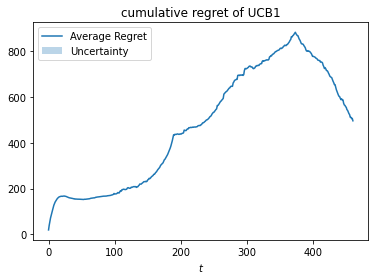

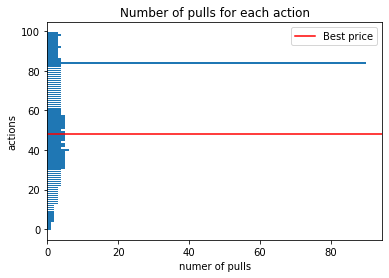

In [46]:
# Parameters
n_points = 100  # actions number 
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days  = data['prices_matrix'].shape[0]
T = n_days

prices = np.linspace(0, max_price, n_points)


best_arm_index = np.argmax(rewards_matrix.sum(axis=0))
best_arm = prices[best_arm_index]
clairvoyant_rewards = rewards_matrix[:, best_arm_index]
n_trials = 100

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    ucb_agent = UCB1Agent(K, T, range=10)

    agent_rewards = np.array([])

    for t in range(T):
        pi_t = ucb_agent.pull_arm() ## the agent returns the index!!
        p_t = prices[pi_t] # I get the actual price
        r_t = rewards_matrix[t, pi_t]
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(100), ucb_agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show();

**Comment:**  
Probably the enviroment shows too adversarial behavoir for making the UCB1 agent learn, in fact, it fails in the task of learning the optimal price.

## EXP3

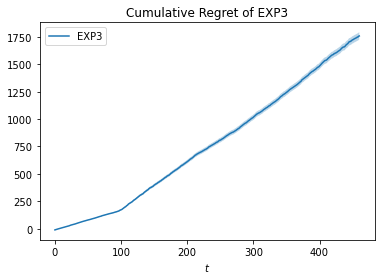

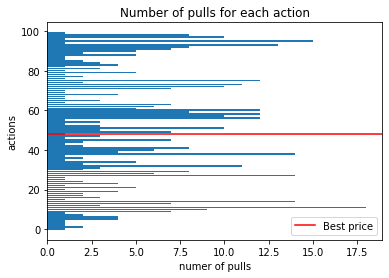

In [47]:
# Parameters
n_points = 100 # actions number
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days = data['prices_matrix'].shape[0]
T = data['prices_matrix'].shape[0]

prices = np.linspace(0, max_price, n_points)

learning_rate = np.sqrt(np.log(K)/(K*T)) # we set the learning rate as prescribed by the theory ( circa 0.01)

max_reward = (max_price - cost) * n_customers
loss_seq = max_reward - rewards_matrix

best_arm_index = np.argmin(loss_seq.sum(axis=0))
best_arm = prices_matrix[0, best_arm_index]
clairvoyant_losses = loss_seq[:, best_arm_index]


n_trials = 100

exp3_regret_per_trial = []
# we keep the loss sequence fixed, we will only observe uncertainty due to algorithm's randomizations
for trial in range(n_trials):
    agent = EXP3Agent(K, learning_rate)
    
    expected_agent_losses = np.array([])
    for t in range(T):
        a_t = agent.pull_arm()
        l_t = loss_seq[t, a_t]
        agent.update(l_t)
        # logging
        expected_agent_losses = np.append(expected_agent_losses,
                                        np.dot(agent.x_t,
                                        loss_seq[t-1,:]))

    cumulative_regret = np.cumsum(expected_agent_losses-clairvoyant_losses)
    exp3_regret_per_trial.append(cumulative_regret)

exp3_regret_per_trial = np.array(exp3_regret_per_trial)

exp3_average_regret = exp3_regret_per_trial.mean(axis=0)
exp3_regret_sd = exp3_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), exp3_average_regret, label='EXP3')
plt.title('Cumulative Regret of EXP3')
plt.fill_between(np.arange(T),
                exp3_average_regret-exp3_regret_sd/np.sqrt(n_trials),
                exp3_average_regret+exp3_regret_sd/np.sqrt(n_trials),
                alpha=0.3)
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(K), agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show()

**Comment:**  
EXP3 fails learning the optimal price in terms of minimum cumulative loss, showing basically a tendence to remain uncertain (I've done some trials changing the learning rate but the result is the same)

# Unseccessful product

In [17]:
# Load the data
file_path = "Dati/Logit_S=2_Decreasing.npz"

data = np.load(file_path)
prices_matrix = data['prices_matrix']
probabilities_matrix = data['probabilities_matrix']
customers_number_matrix = data['customers_number_matrix']
rewards_matrix = data['rewards_matrix']
beta_parameters = data['beta_parameters']
jump_days = data['jump_days']

print(f"Matrices loaded from {file_path}")

Matrices loaded from Dati/Logit_S=2_Decreasing.npz


## Environment situation

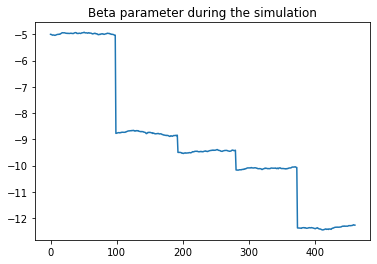

Beta: -5.032249625883139
Beta: -8.840827349932788
Beta: -9.411734501719117
Beta: -10.069526520592861
Beta: -12.264926339220604


In [18]:
# History of the beta parameter
n_days = data['prices_matrix'].shape[0]

plt.figure()
plt.plot(np.linspace(0, n_days, n_days+1),beta_parameters)
plt.title('Beta parameter during the simulation')
plt.savefig('BetaSequence_Unsuccessful.png')
plt.show()

# Values of beta in the jumps
for jump_day in jump_days:
    print(f'Beta: {beta_parameters[int(jump_day)]}')

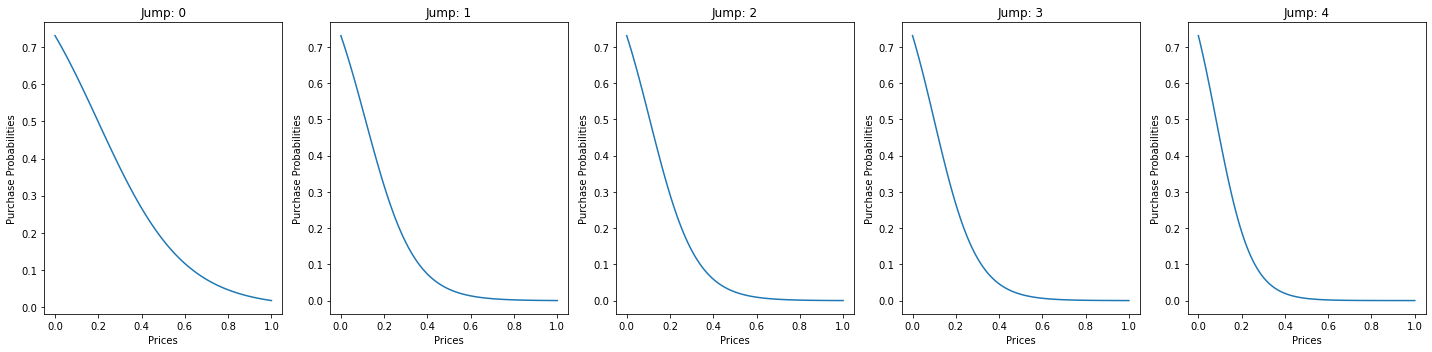

In [19]:
# Plot of the purchase probability when beta jumps
PurchaseProbabilityLogit_plot(beta_parameters, jump_days)

## UCB1

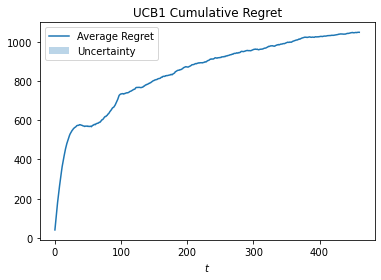

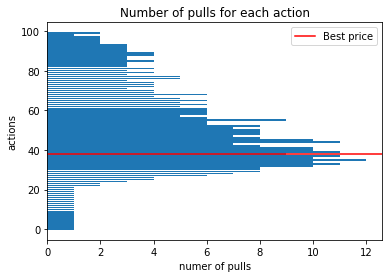

In [20]:
# Parameters
n_points = 100  # actions number 
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days  = data['prices_matrix'].shape[0]
T = n_days

prices = np.linspace(0, max_price, n_points)


best_arm_index = np.argmax(rewards_matrix.sum(axis=0))
best_arm = prices[best_arm_index]
clairvoyant_rewards = rewards_matrix[:, best_arm_index]
n_trials = 100

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    ucb_agent = UCB1Agent(K, T, range=1)

    agent_rewards = np.array([])

    for t in range(T):
        pi_t = ucb_agent.pull_arm() ## the agent returns the index!!
        p_t = prices[pi_t] # I get the actual price
        r_t = rewards_matrix[t, pi_t]
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('UCB1 Cumulative Regret')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.savefig('CumulativeRegret_UCB1.png')
plt.show()

plt.figure()
plt.barh(np.arange(100), ucb_agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.savefig('PulledActions_UCB1.png')
plt.show();

**Comment:**  
Here the classical UCB1 algorithm (range = 1) performs pretty well, achieving sub-linear regret and learning the optimal price.

## EXP3

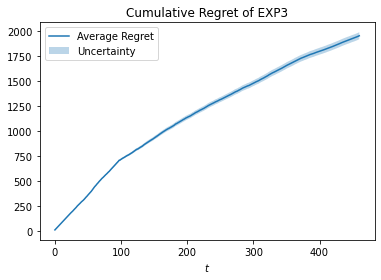

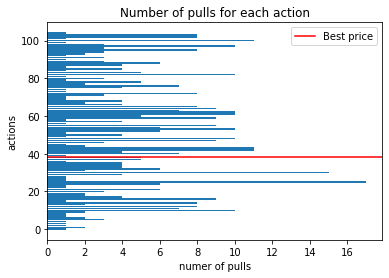

In [21]:
# Parameters
n_points = 105 # actions number
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days = data['prices_matrix'].shape[0]
T = data['prices_matrix'].shape[0]

prices = np.linspace(0, max_price, n_points)

learning_rate = np.sqrt(np.log(K)/(K*T)) # we set the learning rate as prescribed by the theory ( circa 0.01)

max_reward = (max_price - cost) * n_customers
loss_seq = max_reward - rewards_matrix

best_arm_index = np.argmin(loss_seq.sum(axis=0))
best_arm = prices_matrix[0, best_arm_index]
clairvoyant_losses = loss_seq[:, best_arm_index]


n_trials = 100

exp3_regret_per_trial = []
# we keep the loss sequence fixed, we will only observe uncertainty due to algorithm's randomizations
for trial in range(n_trials):
    agent = EXP3Agent(K, learning_rate)
    
    expected_agent_losses = np.array([])
    for t in range(T):
        a_t = agent.pull_arm()
        l_t = loss_seq[t, a_t]
        agent.update(l_t)
        # logging
        expected_agent_losses = np.append(expected_agent_losses,
                                        np.dot(agent.x_t,
                                        loss_seq[t-1,:]))

    cumulative_regret = np.cumsum(expected_agent_losses-clairvoyant_losses)
    exp3_regret_per_trial.append(cumulative_regret)

exp3_regret_per_trial = np.array(exp3_regret_per_trial)

exp3_average_regret = exp3_regret_per_trial.mean(axis=0)
exp3_regret_sd = exp3_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), exp3_average_regret, label='Average Regret')
plt.title('Cumulative Regret of EXP3')
plt.fill_between(np.arange(T),
                exp3_average_regret-exp3_regret_sd/np.sqrt(n_trials),
                exp3_average_regret+exp3_regret_sd/np.sqrt(n_trials),
                alpha=0.3, label='Uncertainty')
plt.xlabel('$t$')
plt.legend()
plt.savefig('CumulativeRegret_EXP3.png')
plt.show()

plt.figure()
plt.barh(np.arange(K), agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.savefig('PulledActions_EXP3.png')
plt.show()

**Comment:**  
It seems that after a while the regret starts having sub-linear shape, however the algorithm shows a lot of uncentainty, even if the mos pulled arms are close to the optimal one; moreover the regret magnitude is more or less two times the UCB one.

# Unnreasonable successful product

In [22]:
# Load the data
file_path = "Dati/Logit_S=2.npz"

data = np.load(file_path)
prices_matrix = data['prices_matrix']
probabilities_matrix = data['probabilities_matrix']
customers_number_matrix = data['customers_number_matrix']
rewards_matrix = data['rewards_matrix']
beta_parameters = data['beta_parameters']
jump_days = data['jump_days']

print(f"Matrices loaded from {file_path}")

Matrices loaded from Dati/Logit_S=2.npz


## Environment situation


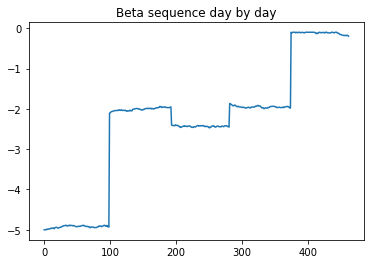

Beta: -4.934299697966296
Beta: -1.9545025076555258
Beta: -2.4522925111998566
Beta: -1.9800287897891482
Beta: -0.19773904565299885


In [23]:
# History of the beta parameter
n_days = data['prices_matrix'].shape[0]

plt.figure()
plt.plot(np.linspace(0, n_days, n_days+1),beta_parameters)
plt.title('Beta sequence day by day')
plt.show()

# Values of beta in the jumps
for jump_day in jump_days:
    print(f'Beta: {beta_parameters[int(jump_day)]}')

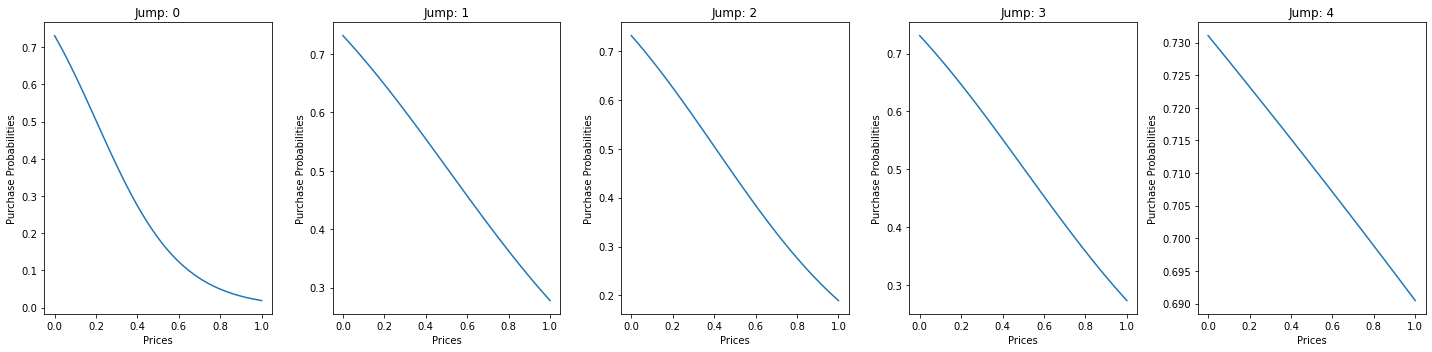

In [24]:
# Plot of the purchase probability when beta jumps
PurchaseProbabilityLogit_plot(beta_parameters, jump_days)

**Comment:**  
The environment seems adversarial, in the fugure above we can appreciate the changes in the shape of the purchase probability function due to big perturbations (correspondent to jumps in the market) of its beta parameter.  
There is a porblem, the **best price is always 1**, why?  
The reason is because the **purchase probability function is not enough decreasing** and so the probbailitiy to purchase is not enough different between the lower prices and the grater ones, so it becomes clearly convinient to select the highest price.   
We can explain this environment situation thinking about a **new product on the market** (new brand of something) that at the beginning requires to be cheap in order to attract clients, but, once they have verified the product high quality wrt the copetitors one, they buy it even at the highest possible price; 

## UCB1

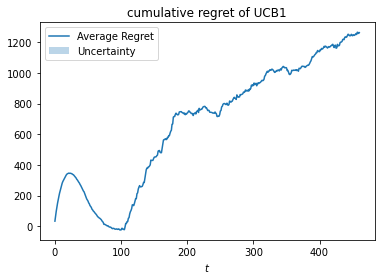

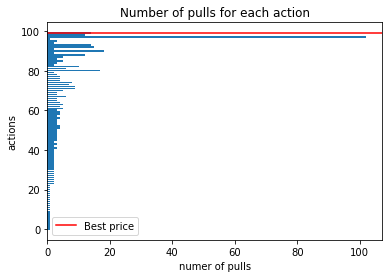

In [25]:
# Parameters
n_points = 100  # actions number 
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days  = data['prices_matrix'].shape[0]
T = n_days

prices = np.linspace(0, max_price, n_points)


best_arm_index = np.argmax(rewards_matrix.sum(axis=0))
best_arm = prices[best_arm_index]
clairvoyant_rewards = rewards_matrix[:, best_arm_index]
n_trials = 100

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    ucb_agent = UCB1Agent(K, T, range=15)

    agent_rewards = np.array([])

    for t in range(T):
        pi_t = ucb_agent.pull_arm() ## the agent returns the index!!
        p_t = prices[pi_t] # I get the actual price
        r_t = rewards_matrix[t, pi_t]
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(100), ucb_agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show();

**Reflexion:**  
In this scenario:  
- The clairvoyants, which plays always the same best action (in terms of comulative rewards), selects price = 1 at every iteration;
- The UCB agent explores at the beginning lower prices, gaining very small regret (see the cumulative regret plot for t < 100), but then he learns that the optimal price is higher and, going in the direction of price = 1, he moves close to the  clairvoyant behavoir (see the cumulative regret plot for t > 200)

Probably UCB1 performs quite well in the strange scenario because of the fact that the environment stabilizes in a certain sense, creating a simple situation, similar to a stochastic one.

## EXP3

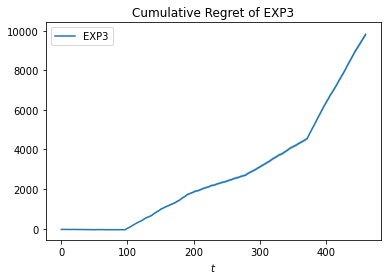

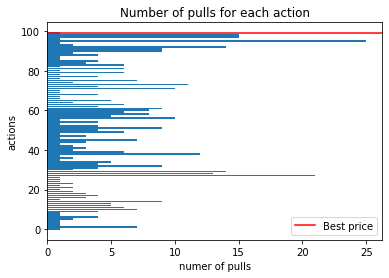

In [26]:
# Parameters
n_points = 100 # actions number
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days = data['prices_matrix'].shape[0]
T = data['prices_matrix'].shape[0]

prices = np.linspace(0, max_price, n_points)

learning_rate = np.sqrt(np.log(K)/(K*T)) # we set the learning rate as prescribed by the theory ( circa 0.01)

max_reward = (max_price - cost) * n_customers
loss_seq = max_reward - rewards_matrix

best_arm_index = np.argmin(loss_seq.sum(axis=0))
best_arm = prices_matrix[0, best_arm_index]
clairvoyant_losses = loss_seq[:, best_arm_index]


n_trials = 100

exp3_regret_per_trial = []
# we keep the loss sequence fixed, we will only observe uncertainty due to algorithm's randomizations
for trial in range(n_trials):
    agent = EXP3Agent(K, learning_rate)
    
    expected_agent_losses = np.array([])
    for t in range(T):
        a_t = agent.pull_arm()
        l_t = loss_seq[t, a_t]
        agent.update(l_t)
        # logging
        expected_agent_losses = np.append(expected_agent_losses,
                                        np.dot(agent.x_t,
                                        loss_seq[t-1,:]))

    cumulative_regret = np.cumsum(expected_agent_losses-clairvoyant_losses)
    exp3_regret_per_trial.append(cumulative_regret)

exp3_regret_per_trial = np.array(exp3_regret_per_trial)

exp3_average_regret = exp3_regret_per_trial.mean(axis=0)
exp3_regret_sd = exp3_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), exp3_average_regret, label='EXP3')
plt.title('Cumulative Regret of EXP3')
plt.fill_between(np.arange(T),
                exp3_average_regret-exp3_regret_sd/np.sqrt(n_trials),
                exp3_average_regret+exp3_regret_sd/np.sqrt(n_trials),
                alpha=0.3)
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(K), agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show()

# Not Monotonic

In [86]:
# Load the data
file_path = "Dati/NotMonotonic1.npz"

data = np.load(file_path)
prices_matrix = data['prices_matrix']
probabilities_matrix = data['probabilities_matrix']
customers_number_matrix = data['customers_number_matrix']
rewards_matrix = data['rewards_matrix']
beta_parameters = data['beta_parameters']
jump_days = data['jump_days']

print(f"Matrices loaded from {file_path}")

Matrices loaded from Dati/NotMonotonic1.npz


## Environment situation

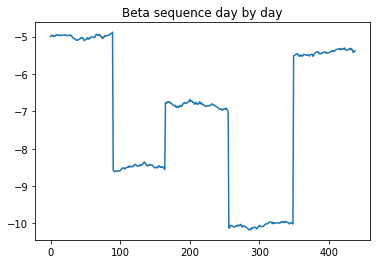

Beta: -4.885771497264408
Beta: -8.553770556828475
Beta: -7.007661735587441
Beta: -10.01088657922299
Beta: -5.380395152807346


In [87]:
# History of the beta parameter
n_days = data['prices_matrix'].shape[0]

plt.figure()
plt.plot(np.linspace(0, n_days, n_days+1),beta_parameters)
plt.title('Beta sequence day by day')
#plt.savefig('BetaSequence_NotMonotonic.png')
plt.show()

# Values of beta in the jumps
for jump_day in jump_days:
    print(f'Beta: {beta_parameters[int(jump_day)]}')

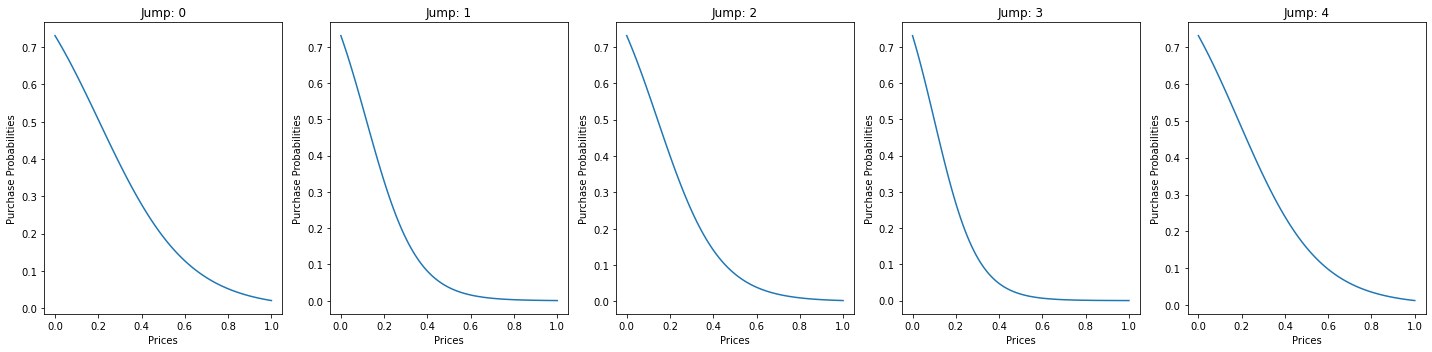

In [88]:
# Plot of the purchase probability when beta jumps
PurchaseProbabilityLogit_plot(beta_parameters, jump_days)

## UCB1

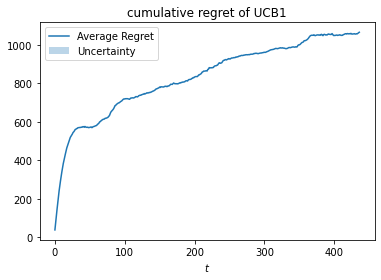

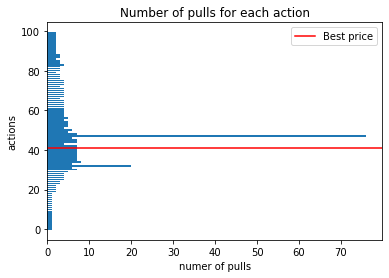

In [94]:
# Parameters
n_points = 100  # actions number 
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days  = data['prices_matrix'].shape[0]
T = n_days

prices = np.linspace(0, max_price, n_points)


best_arm_index = np.argmax(rewards_matrix.sum(axis=0))
best_arm = prices[best_arm_index]
clairvoyant_rewards = rewards_matrix[:, best_arm_index]
n_trials = 100

regret_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    ucb_agent = UCB1Agent(K, T, range=3)

    agent_rewards = np.array([])

    for t in range(T):
        pi_t = ucb_agent.pull_arm() ## the agent returns the index!!
        p_t = prices[pi_t] # I get the actual price
        r_t = rewards_matrix[t, pi_t]
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

regret_per_trial = np.array(regret_per_trial)

average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(100), ucb_agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show();

## EXP3

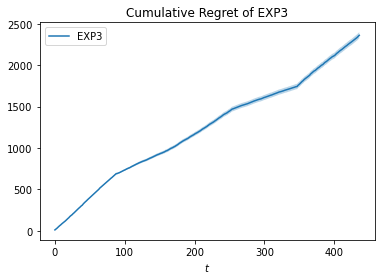

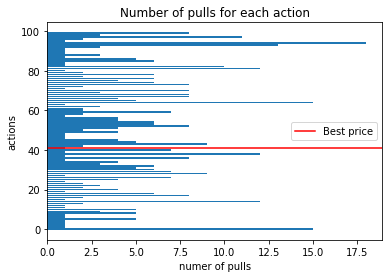

In [91]:
# Parameters
n_points = 100 # actions number
cost = 0.2
n_customers = 200
max_price = 1.0

K = n_points
n_days = data['prices_matrix'].shape[0]
T = data['prices_matrix'].shape[0]

prices = np.linspace(0, max_price, n_points)

learning_rate = np.sqrt(np.log(K)/(K*T)) # we set the learning rate as prescribed by the theory ( circa 0.01)

max_reward = (max_price - cost) * n_customers
loss_seq = max_reward - rewards_matrix

best_arm_index = np.argmin(loss_seq.sum(axis=0))
best_arm = prices_matrix[0, best_arm_index]
clairvoyant_losses = loss_seq[:, best_arm_index]


n_trials = 100

exp3_regret_per_trial = []
# we keep the loss sequence fixed, we will only observe uncertainty due to algorithm's randomizations
for trial in range(n_trials):
    agent = EXP3Agent(K, learning_rate)
    
    expected_agent_losses = np.array([])
    for t in range(T):
        a_t = agent.pull_arm()
        l_t = loss_seq[t, a_t]
        agent.update(l_t)
        # logging
        expected_agent_losses = np.append(expected_agent_losses,
                                        np.dot(agent.x_t,
                                        loss_seq[t-1,:]))

    cumulative_regret = np.cumsum(expected_agent_losses-clairvoyant_losses)
    exp3_regret_per_trial.append(cumulative_regret)

exp3_regret_per_trial = np.array(exp3_regret_per_trial)

exp3_average_regret = exp3_regret_per_trial.mean(axis=0)
exp3_regret_sd = exp3_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), exp3_average_regret, label='EXP3')
plt.title('Cumulative Regret of EXP3')
plt.fill_between(np.arange(T),
                exp3_average_regret-exp3_regret_sd/np.sqrt(n_trials),
                exp3_average_regret+exp3_regret_sd/np.sqrt(n_trials),
                alpha=0.3)
plt.xlabel('$t$')
plt.legend()
plt.show()

plt.figure()
plt.barh(np.arange(K), agent.N_pulls)
plt.axhline(best_arm_index, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('numer of pulls')
plt.legend()
plt.title('Number of pulls for each action')
plt.show()

**Comment:**  
In this final scenario the EXP3 algorithm shows, as usual, worse performance than UCB1, but here the uncertainty showed is different.
Usually, in fact, from the pulled arms plot the algorithm seems to never stop exploring, here instead he's still uncertain but only among few arms, that are by the way pretty different between each other.